# Intuit / Quicken Quickbooks Group Assignment
Class: Marketing Analytics (EWMBA263 -1)
Team: Albert Deng, Peter Pang, Alex Im, and DJ Prahladka

## 0. Data Initialization

Import data and look at the variables available

In [1]:
import pandas
import shared.mba263 as mba263
import matplotlib.pyplot as plt
import numpy as np

data = pandas.read_csv('shared/intuit.csv')
data.head(10)

c:\Users\alber\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,0
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,0
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,0
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,0
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,0
5,6,U,1,99999,20,1,61.5,14,20,0,0,1,0
6,7,U,1,99999,20,1,56.0,5,27,0,0,1,0
7,8,U,1,99999,20,1,39.5,4,2,0,0,0,0
8,9,U,1,99999,20,1,22.0,17,1,0,0,0,1
9,10,U,1,99999,20,2,113.0,7,15,0,0,0,0


In [2]:
data.describe()

,id,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
count,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.244400,54350.2613,10.499000,2.079450,93.581000,15.779650,15.751400,0.208250,0.027100,0.215600,0.048050
std,5773.647028,0.429742,32776.4059,5.766755,1.246361,82.601398,9.527331,10.020435,0.406067,0.162379,0.411248,0.213877
min,1.000000,0.000000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,0.000000,23451.0000,5.000000,1.000000,37.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,0.000000,55402.5000,10.500000,2.000000,71.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.250000,0.000000,89018.7500,15.250000,3.000000,124.500000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000
max,20000.000000,1.000000,99999.0000,20.000000,5.000000,937.500000,36.000000,36.000000,1.000000,1.000000,1.000000,1.000000


## 1. Data Selection and Analysis
### a) Data Transformation

Add additional variables and define scope for evaluation

In [3]:
# Add transformational ordinal and indicator variables
data = pandas.get_dummies(data, columns=['sex'])

# Define deciles for RFM
data['r_decile'] = mba263.ntile(data['last'], 10)
data['f_decile'] = mba263.ntile(data['numords'], 10)
data['m_decile'] = mba263.ntile(data['dollars'], 10)

# Reverse frequency and monetary deciles where we want higher first
data['f_decile'] = 9 - data['f_decile']
data['m_decile'] = 9 - data['m_decile']

# Explore variable correlation
data.corr()

,id,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,sex_B,sex_F,sex_M,sex_U,r_decile,f_decile,m_decile
id,1.000000,0.019549,0.951592,0.950288,0.011851,0.002533,-0.008602,-0.004941,-0.010066,0.003038,-0.002295,-0.067746,-0.009454,0.042165,-0.042447,0.010227,-0.006898,-0.011224,-0.008712
bizflag,0.019549,1.000000,0.020482,0.019832,0.004448,-0.002881,0.001381,0.000281,-0.003704,0.005399,0.004286,-0.012441,-0.026705,0.012127,-0.236845,0.321975,0.001927,-0.004251,0.005362
zip,0.951592,0.020482,1.000000,0.991646,0.010041,-0.000290,-0.012345,-0.003814,-0.009068,0.007811,-0.000025,-0.066572,-0.013720,0.034798,-0.042820,0.020208,-0.010549,-0.009770,-0.005755
zip_bins,0.950288,0.019832,0.991646,1.000000,0.010408,0.000031,-0.011061,-0.004327,-0.010363,0.008039,0.000302,-0.066915,-0.010725,0.034556,-0.044303,0.022168,-0.009526,-0.009763,-0.006010
numords,0.011851,0.004448,0.010041,0.010408,1.000000,0.583424,-0.135637,0.010710,0.002775,0.116107,0.015454,0.085845,-0.007275,0.001598,-0.004697,0.005688,-0.139905,-0.973281,-0.613537
dollars,0.002533,-0.002881,-0.000290,0.000031,0.583424,1.000000,-0.081646,0.000722,0.001370,0.079956,0.008115,0.068543,-0.002152,0.003290,0.000137,-0.003853,-0.083258,-0.574157,-0.843379
last,-0.008602,0.001381,-0.012345,-0.011061,-0.135637,-0.081646,1.000000,0.010799,-0.001412,-0.018021,0.004507,-0.100100,0.015536,0.003174,-0.002707,-0.002173,0.989895,0.136062,0.069442
sincepurch,-0.004941,0.000281,-0.003814,-0.004327,0.010710,0.000722,0.010799,1.000000,0.516243,0.001559,0.517050,0.076105,-0.003521,0.001968,-0.011012,0.013596,0.010084,-0.010875,-0.003135
version1,-0.010066,-0.003704,-0.009068,-0.010363,0.002775,0.001370,-0.001412,0.516243,1.000000,-0.081803,-0.268877,0.041380,-0.003057,-0.003382,0.006474,-0.004604,-0.000861,-0.005665,0.000375
owntaxprod,0.003038,0.005399,0.007811,0.008039,0.116107,0.079956,-0.018021,0.001559,-0.081803,1.000000,0.091460,0.012896,-0.001265,0.000876,0.005220,-0.008216,-0.018945,-0.135363,-0.096426


Based on the above correlation matrix there appears to be an interaction between the following variables: (numords and dollars, sincepurch and version1, sex_U and bizflag). So we create new variables for these 3 interactions

In [4]:
# Construct interactions based on 
data['sincepurch_version1'] = data['sincepurch'] * data['version1']
data['numords_dollars'] = data['numords'] * data['dollars']
data['unknown_bizflag'] = data['sex_U'] * data['bizflag']

# Create new zip bins that are based on the fisrt 2 or 3 digits of the zip code. 
data['zip'] = data['zip'].astype(str).str.zfill(5)
data['zip_2'] = data['zip'].str[:2].astype(int)
data['zip_3'] = data['zip'].str[:3].astype(int)

Define several sets of variables to test and evaluate different subsets of data / variables, ultimately to determine which variables produce the best results

In [5]:
# Define scope for columns
#Variables1 uses the originally created zip_bins column with the raw values of the RFM columns
variables1 = ['sex_M','sex_F','sex_U','bizflag','zip_bins',
                                'numords','dollars','last','sincepurch','version1','owntaxprod','upgraded']

## Evaluate whether to use zip_2 or zip_3
#Variables2a uses the newly created zip_2 column with the raw values of the RFM columns
variables2a = ['sex_M','sex_F','sex_U','bizflag','zip_2',
                                'numords','dollars','last','sincepurch','version1','owntaxprod','upgraded']

#Variables2b uses the newly created zip_3 column with the raw values of the RFM columns
variables2b = ['sex_M','sex_F','sex_U','bizflag','zip_3',
                                'numords','dollars','last','sincepurch','version1','owntaxprod','upgraded']

## Evaluate success of interaction variables
#Variables3 adds in the interaction elements to variables2
variables3a = ['sex_M','sex_F','sex_U','bizflag','zip_2',
                                'numords','dollars','last','sincepurch','version1','owntaxprod','upgraded','sincepurch_version1','numords_dollars', 'unknown_bizflag']

#Variables3 adds in the interaction elements to variables2
variables3b = ['sex_M','sex_F','sex_U','bizflag','zip_3',
                                'numords','dollars','last','sincepurch','version1','owntaxprod','upgraded','sincepurch_version1','numords_dollars', 'unknown_bizflag']

#Variables4 uses the RFM deciles instead of RFM raw variables compared for variables 3
variables4 = ['sex_M','sex_F','sex_B','sex_U','bizflag','zip_3',
                                'r_decile', 'f_decile', 'm_decile','sincepurch','version1','owntaxprod','upgraded','sincepurch_version1','numords_dollars', 'unknown_bizflag']

## 1. Run analyses
### a) Conduct RFM Analysis
Conduct both a sequential and independent RFM analysis, adding predictions on both. Begin by constructing deciles and RFM columns.

In [6]:
# Construct RFM scores
# Start with independent RFM score
data['rfm_independent'] = data['r_decile'] * 100 + data['f_decile'] * 10 + data['m_decile']

# Construct sequential RFM score
data['rfm_sequential'] = mba263.rfm_sq(data[['dollars', 'numords', 'last']], 10)

Generate predictions based on RFM score, where the RFM response rate is higher than the breakeven response rate

In [7]:
# Calculate the breakeven response rate
per_person_mail_cost = 1.41 # assumption from supporting doc
per_person_profit = 60 # assumption from supporting doc

# These numbers assume breakeven rate is halved
breakeven_rate = per_person_mail_cost / per_person_profit
print("Breakeven Rate: {:.2%}".format(breakeven_rate))

# Iterate over all the RFM values and assign a variable if RFM indicates it exceeds breakeven
data["res_rfmi"] = 0
data["res_rfms"] = 0

# Iterate over every single group
for i in range(1000):
    subset_rfm_i = data.loc[data["rfm_independent"] == i]
    subset_rfm_s = data.loc[data["rfm_sequential"] == i]

    # Calculate the response rate for each group, halved per case instructions
    data.loc[data["rfm_independent"] == i, "p_rfmi"] = subset_rfm_i["res1"].mean() / 2
    data.loc[data["rfm_sequential"] == i, "p_rfms"] = subset_rfm_s["res1"].mean() / 2

    # Select data for targeting, halving the predicted response rate
    if data.loc[data["rfm_independent"] == i, "p_rfmi"].mean() > breakeven_rate:
        data.loc[data["rfm_independent"] == i, "res_rfmi"] = 1

    if data.loc[data["rfm_sequential"] == i, "p_rfms"].mean() > breakeven_rate:
        data.loc[data["rfm_sequential"] == i, "res_rfms"] = 1

Breakeven Rate: 2.35%


### b) Run ML Models
Create several helper functions that will run all the models for a given dataset; these functions will cover scoring based on profit, tuning hyperparameters using a kfold cross-validation search, and running all the models.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# Create a custom scoring function based on expected profit
def exp_profit_scoring(predictions, actuals):
    cm = confusion_matrix(actuals, predictions)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    exp_profit = (TP*per_person_profit/2) + per_person_mail_cost * (TP+FP)
    return exp_profit

# A function to identify the best parameter(s) for a model tested using cross-validation
def tune_hyperparameters(train_dataset, predict, variables, threshold, param_grid, mod_type):
   # Set up the KFold object
   kf = KFold(n_splits=5, shuffle=True, random_state=0)
   best_score = -np.inf
   
   # Loop over the parameter grid for logistic regressions and neural networks
   if mod_type == 'logit_reg' or mod_type == 'neural_network':
      for a in param_grid['a']:
         scores = []
         
         # Loop over the cross-validation folds
         for train_index, test_index in kf.split(train_dataset):

            # Split the dataset
            x_train, x_test = train_dataset.iloc[train_index][variables], train_dataset.iloc[test_index][variables]
            y_train, y_test = train_dataset.iloc[train_index][predict], train_dataset.iloc[test_index][predict]

            # Fit and run the model
            if mod_type == 'logit_reg':
               model = mba263.logit_reg(y_train, x_train, a)
            elif mod_type == 'neural_network':
               model = mba263.neural_network(y_train, x_train, a)
               
            # Score results
            y_pred = np.where(model.predict(x_test) / 2 > threshold, 1, 0)
            scores.append(exp_profit_scoring(y_pred, y_test))

         # Compute the average score
         mean_score = np.mean(scores)

         # If the score is better, record the parameter
         if mean_score > best_score:
            best_score = mean_score
            best_param = {'a': a}
         
         # Reset scores
         scores.clear()

   # Create nested loop for random forests since there are two parameters to tune
   elif mod_type == 'random_forest':
      # Loop over the parameter grid for random forests
      for j in param_grid['trees']:
         for k in param_grid['leaf_nodes']:
            scores = []
            
            # Loop over the cross-validation folds
            for train_index, test_index in kf.split(train_dataset):

               # Split the dataset
               x_train, x_test = train_dataset.iloc[train_index][variables], train_dataset.iloc[test_index][variables]
               y_train, y_test = train_dataset.iloc[train_index][predict], train_dataset.iloc[test_index][predict]

               # Fit and run the model
               model = mba263.random_forest(y_train, x_train, j, k)
                  
               # Score results
               y_pred = np.where(model.predict(x_test) / 2 > threshold, 1, 0)
               scores.append(exp_profit_scoring(y_pred, y_test))
                  
            # Compute the average score
            mean_score = np.mean(scores)

            # If the score is better, record the parameter
            if mean_score > best_score:
               best_score = mean_score
               best_param = {'trees': j, 'leaf_nodes': k}

            # Reset scores
            scores.clear()

   # Return the best parameter
   return best_param

### A function to run a logistic regression, a logistic regression w/ regularization, 
### a neural network, and a random forest
### Function adds two columns, p for probability and res if selected for targeting
def run_ml_models(dataset, predict, variables, threshold=breakeven_rate):
    df = dataset.copy()

    # Split dataset into train and test, training on 80% and holding 20%
    train, test = train_test_split(df, test_size=0.2, random_state=0)

    ### Use a simple logistic regression
    ### ------------------------------------------------
    result_logit = mba263.logit(train[predict], train[variables])
    
    # Run model on train and test
    train['p_log'] = result_logit.predict(train[variables]) / 2
    train['res_log'] = np.where(train['p_log'] > threshold, 1, 0)
    test['p_log'] = result_logit.predict(test[variables]) / 2
    test['res_log'] = np.where(test['p_log'] > threshold, 1, 0)

    ### Use a logistic regression with regularization
    ### ------------------------------------------------
    logit_reg_param_grid = {'a': [0.1, 0.5, 1, 5, 10, 25]}
    best_param_logit_reg = tune_hyperparameters(train, predict, variables, threshold, logit_reg_param_grid, 'logit_reg')

    # Use the tuned parameter to predict
    result_logit_reg = mba263.logit_reg(train[predict], train[variables], best_param_logit_reg['a'])
    train['p_logr'] = result_logit_reg.predict(train[variables]) / 2
    train['res_logr'] = np.where(train['p_logr'] > threshold, 1, 0)
    test['p_logr'] = result_logit_reg.predict(test[variables]) / 2
    test['res_logr'] = np.where(test['p_logr'] > threshold, 1, 0)

    ### Use a neural network
    ### ------------------------------------------------
    neural_network_param_grid = {'a': [0.01, 0.1, 1, 5, 10, 25]}
    best_param_nn = tune_hyperparameters(train, predict, variables, threshold, neural_network_param_grid, 'neural_network')

    # Use the tuned parameter to predict
    result_nn = mba263.neural_network(train[predict], train[variables], best_param_nn['a'])
    train['p_nn'] = result_nn.predict(train[variables]) / 2
    train['res_nn'] = np.where(train['p_nn'] > threshold, 1, 0)
    test['p_nn'] = result_nn.predict(test[variables]) / 2
    test['res_nn'] = np.where(test['p_nn'] > threshold, 1, 0)

    ### Use a random forest
    ### ------------------------------------------------
    random_forest_param_grid = {'trees': [250, 300, 450], 'leaf_nodes': [3, 4, 5]}
    best_param_rf = tune_hyperparameters(train, predict, variables, threshold, random_forest_param_grid, 'random_forest')

    # Used the tuned parameters to predict
    result_rf = mba263.random_forest(train[predict], train[variables], best_param_rf['trees'], best_param_rf['leaf_nodes'])
    train['p_rf'] = result_rf.predict(train[variables]) / 2
    train['res_rf'] = np.where(train['p_rf'] > threshold, 1, 0)
    test['p_rf'] = result_rf.predict(test[variables]) / 2
    test['res_rf'] = np.where(test['p_rf'] > threshold, 1, 0)

    # Rename res1 to actuals
    train['actual_res'] = train['res1']
    test['actual_res'] = test['res1']

    # Return three items, the results on the test dataset, the results on the training, and the models
    return [test[['id', 'p_log','p_logr','p_nn','p_rf', 'p_rfmi', 'p_rfms', 
               'actual_res', 'res_log','res_logr','res_nn','res_rf', 'res_rfmi', 'res_rfms']],
            train[['id', 'p_log','p_logr','p_nn','p_rf', 'p_rfmi', 'p_rfms', 
               'actual_res', 'res_log','res_logr','res_nn','res_rf', 'res_rfmi', 'res_rfms']], 
               [result_logit, result_logit_reg, result_nn, result_rf],
               [best_param_logit_reg, best_param_nn, best_param_rf]]

Run the ML models

In [9]:
# Create predictions
predictions1, actuals1, models1, params1 = run_ml_models(data, "res1", variables1)
predictions2a, actuals2a, models2a, params2a = run_ml_models(data, "res1", variables2a)
predictions2b, actuals2b, models2b, params2b = run_ml_models(data, "res1", variables2b)
predictions3a, actuals3a, models3a, params3a = run_ml_models(data, "res1", variables3a)
predictions3b, actuals3b, models3b, params3b = run_ml_models(data, "res1", variables3b)
predictions4, actuals4, models4, params4 = run_ml_models(data, "res1", variables4)

Optimization terminated successfully.
         Current function value: 0.174841
         Iterations 8
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.17719943833938678
            Iterations: 229
            Function evaluations: 235
            Gradient evaluations: 229
QC check did not pass for 4 out of 13 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.17378723742370017
            Iterations: 208
            Function evaluations: 215
            Gradient evaluations: 208
QC check did not pass for 4 out of 13 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.1765154102823993
            Iterations: 235
            Function evaluations: 241
          

In [10]:
# Print regularization parameters just for edification
def print_params(params):
    print("Logistic Regression Regularization Parameter: {}".format(params[0]['a']))
    print("Neural Network Regularization Parameter: {}".format(params[1]['a']))
    print("Random Forest Trees: {}, Leaf Nodes: {}".format(params[2]['trees'], params[2]['leaf_nodes']))

print("Dataset 1 Parameters")
print_params(params1)
print("Dataset 2a Parameters")
print_params(params2a)
print("Dataset 2b Parameters")
print_params(params2b)
print("Dataset 3a Parameters")
print_params(params3b)
print("Dataset 3b Parameters")
print_params(params3b)
print("Dataset 4 Parameters")
print_params(params4)

Dataset 1 Parameters
Logistic Regression Regularization Parameter: 25
Neural Network Regularization Parameter: 25
Random Forest Trees: 250, Leaf Nodes: 3
Dataset 2a Parameters
Logistic Regression Regularization Parameter: 25
Neural Network Regularization Parameter: 25
Random Forest Trees: 300, Leaf Nodes: 3
Dataset 2b Parameters
Logistic Regression Regularization Parameter: 25
Neural Network Regularization Parameter: 25
Random Forest Trees: 300, Leaf Nodes: 3
Dataset 3a Parameters
Logistic Regression Regularization Parameter: 25
Neural Network Regularization Parameter: 25
Random Forest Trees: 450, Leaf Nodes: 3
Dataset 3b Parameters
Logistic Regression Regularization Parameter: 25
Neural Network Regularization Parameter: 25
Random Forest Trees: 450, Leaf Nodes: 3
Dataset 4 Parameters
Logistic Regression Regularization Parameter: 25
Neural Network Regularization Parameter: 25
Random Forest Trees: 300, Leaf Nodes: 3


Specifically for each logistic regression, print out the coefficients for interpretation

In [13]:
from IPython.display import display

# Print the coefficients for the logistic regressions
def print_coefs(models):
    print("Logistic Regression Coefficients")
    display(models[0].summary())
    print("Logistic Regression w/ Regularization Coefficients")
    display(models[1].summary())

# Print the odds ratios for each logistic regression
def print_odds(models):
    print("Logistic Regression Odds Ratios")
    display(mba263.odds_ratios(models[0]).style)
    print("Logistic Regression w/ Regularization Odds Ratios")
    display(mba263.odds_ratios(models[1]).style)

In [14]:
print("Dataset 1 Coefficients")
print_coefs(models1)
print("Dataset 2a Coefficients")
print_coefs(models2a)
print("Dataset 2b Coefficients")
print_coefs(models2b)
print("Dataset 3b Coefficients")
print_coefs(models3b)
print("Dataset 4 Coefficients")
print_coefs(models4)

Dataset 1 Coefficients
Logistic Regression Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15987
Method:                           MLE   Df Model:                           12
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.07409
Time:                        15:16:05   Log-Likelihood:                -2797.5
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 2.882e-88
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7442      0.632     -2.759      0.006      -2.983      -0.505
sex_M         -1.1017      0.620     -1.777      0.076      -2.317       0.114
sex_F         -1.1907      0.625     -1.906      0.057      -2.415       0.034
sex_U         -1.0798      0.630     -1.715      0.086      -2.314       0.155
bizflag       -0.0793      0.096     -0.823      0.410      -0.268       0.109
zip_bins      -0.0564      0.007     -8.291      0.000      -0.070      -0.043
numords        0.1899      0.034      5.566      0.000       0.123       0.257
dollars        0.0013      0.000      2.813      0.005       0.000       0.002
last          -0.0487      0.004    -11.021      0.000      -0.057      -0.040
sincepurch     0.0055      0.007      0.777      0.437      -0.008       0.020
version1       0.6737      0.157      4.305      0.000       0.367       0.980
owntaxprod     0.0574      0.206      0.278      0.781      -0.347       0.462
upgraded       0.8781      0.152      5.783      0.000       0.580       1.176
==============================================================================
"""

Logistic Regression w/ Regularization Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15993
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.06740
Time:                        15:16:05   Log-Likelihood:                -2817.7
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 7.560e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5177      0.133    -18.984      0.000      -2.778      -2.258
sex_M               0        nan        nan        nan         nan         nan
sex_F               0        nan        nan        nan         nan         nan
sex_U               0        nan        nan        nan         nan         nan
bizflag             0        nan        nan        nan         nan         nan
zip_bins      -0.0654      0.007     -9.710      0.000      -0.079      -0.052
numords        0.1112      0.034      3.249      0.001       0.044       0.178
dollars        0.0015      0.000      3.190      0.001       0.001       0.002
last          -0.0552      0.004    -12.494      0.000      -0.064      -0.047
sincepurch     0.0271      0.004      6.363      0.000       0.019       0.035
version1            0        nan        nan        nan         nan         nan
owntaxprod          0        nan        nan        nan         nan         nan
upgraded       0.1801      0.095      1.903      0.057      -0.005       0.366
==============================================================================
"""

Dataset 2a Coefficients
Logistic Regression Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15987
Method:                           MLE   Df Model:                           12
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.07366
Time:                        15:16:05   Log-Likelihood:                -2798.8
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 1.041e-87
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8244      0.631     -2.890      0.004      -3.062      -0.587
sex_M         -1.0909      0.620     -1.760      0.078      -2.306       0.124
sex_F         -1.1806      0.624     -1.891      0.059      -2.404       0.043
sex_U         -1.0718      0.630     -1.703      0.089      -2.306       0.162
bizflag       -0.0784      0.096     -0.813      0.416      -0.267       0.110
zip_2         -0.0096      0.001     -8.175      0.000      -0.012      -0.007
numords        0.1894      0.034      5.552      0.000       0.123       0.256
dollars        0.0013      0.000      2.817      0.005       0.000       0.002
last          -0.0487      0.004    -11.025      0.000      -0.057      -0.040
sincepurch     0.0056      0.007      0.781      0.435      -0.008       0.020
version1       0.6751      0.157      4.313      0.000       0.368       0.982
owntaxprod     0.0569      0.206      0.276      0.783      -0.348       0.461
upgraded       0.8780      0.152      5.784      0.000       0.580       1.175
==============================================================================
"""

Logistic Regression w/ Regularization Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15993
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.06698
Time:                        15:16:05   Log-Likelihood:                -2818.9
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 2.664e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6001      0.130    -20.078      0.000      -2.854      -2.346
sex_M               0        nan        nan        nan         nan         nan
sex_F               0        nan        nan        nan         nan         nan
sex_U               0        nan        nan        nan         nan         nan
bizflag             0        nan        nan        nan         nan         nan
zip_2         -0.0111      0.001     -9.569      0.000      -0.013      -0.009
numords        0.1106      0.034      3.235      0.001       0.044       0.178
dollars        0.0015      0.000      3.194      0.001       0.001       0.002
last          -0.0552      0.004    -12.499      0.000      -0.064      -0.047
sincepurch     0.0272      0.004      6.381      0.000       0.019       0.036
version1            0        nan        nan        nan         nan         nan
owntaxprod          0        nan        nan        nan         nan         nan
upgraded       0.1793      0.095      1.895      0.058      -0.006       0.365
==============================================================================
"""

Dataset 2b Coefficients
Logistic Regression Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15987
Method:                           MLE   Df Model:                           12
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.07353
Time:                        15:16:05   Log-Likelihood:                -2799.2
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 1.512e-87
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8230      0.631     -2.888      0.004      -3.060      -0.586
sex_M         -1.0908      0.620     -1.760      0.078      -2.305       0.124
sex_F         -1.1808      0.624     -1.891      0.059      -2.405       0.043
sex_U         -1.0718      0.629     -1.703      0.089      -2.306       0.162
bizflag       -0.0785      0.096     -0.814      0.415      -0.267       0.110
zip_3         -0.0010      0.000     -8.129      0.000      -0.001      -0.001
numords        0.1893      0.034      5.551      0.000       0.122       0.256
dollars        0.0013      0.000      2.818      0.005       0.000       0.002
last          -0.0487      0.004    -11.024      0.000      -0.057      -0.040
sincepurch     0.0056      0.007      0.782      0.434      -0.008       0.020
version1       0.6749      0.156      4.313      0.000       0.368       0.982
owntaxprod     0.0567      0.206      0.275      0.784      -0.348       0.461
upgraded       0.8777      0.152      5.783      0.000       0.580       1.175
==============================================================================
"""

Logistic Regression w/ Regularization Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15993
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.06684
Time:                        15:16:06   Log-Likelihood:                -2819.4
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 4.066e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5961      0.130    -20.017      0.000      -2.850      -2.342
sex_M               0        nan        nan        nan         nan         nan
sex_F               0        nan        nan        nan         nan         nan
sex_U               0        nan        nan        nan         nan         nan
bizflag             0        nan        nan        nan         nan         nan
zip_3         -0.0011      0.000     -9.560      0.000      -0.001      -0.001
numords        0.1107      0.034      3.235      0.001       0.044       0.178
dollars        0.0015      0.000      3.194      0.001       0.001       0.002
last          -0.0552      0.004    -12.498      0.000      -0.064      -0.047
sincepurch     0.0272      0.004      6.382      0.000       0.019       0.036
version1            0        nan        nan        nan         nan         nan
owntaxprod          0        nan        nan        nan         nan         nan
upgraded       0.1792      0.095      1.894      0.058      -0.006       0.365
==============================================================================
"""

Dataset 3b Coefficients
Logistic Regression Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15984
Method:                           MLE   Df Model:                           15
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.07374
Time:                        15:16:06   Log-Likelihood:                -2798.5
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 1.760e-85
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.8945      0.639     -2.963      0.003      -3.148      -0.641
sex_M                  -1.0948      0.620     -1.767      0.077      -2.309       0.120
sex_F                  -1.1860      0.624     -1.899      0.058      -2.410       0.038
sex_U                  -1.0532      0.639     -1.647      0.100      -2.306       0.200
bizflag                -0.0708      0.108     -0.658      0.510      -0.281       0.140
zip_3                  -0.0010      0.000     -8.131      0.000      -0.001      -0.001
numords                 0.2006      0.046      4.350      0.000       0.110       0.291
dollars                 0.0017      0.001      1.470      0.142      -0.001       0.004
last                   -0.0487      0.004    -11.027      0.000      -0.057      -0.040
sincepurch              0.0104      0.008      1.227      0.220      -0.006       0.027
version1                1.0091      0.357      2.823      0.005       0.308       1.710
owntaxprod              0.0539      0.207      0.260      0.795      -0.352       0.459
upgraded                0.7947      0.171      4.640      0.000       0.459       1.130
sincepurch_version1    -0.0162      0.016     -1.037      0.300      -0.047       0.014
numords_dollars        -0.0001      0.000     -0.372      0.710      -0.001       0.000
unknown_bizflag        -0.0415      0.240     -0.173      0.863      -0.513       0.430
=======================================================================================
"""

Logistic Regression w/ Regularization Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15991
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.06659
Time:                        15:16:06   Log-Likelihood:                -2820.1
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 5.888e-82
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3604      0.158    -14.895      0.000      -2.671      -2.050
sex_M                        0        nan        nan        nan         nan         nan
sex_F                        0        nan        nan        nan         nan         nan
sex_U                        0        nan        nan        nan         nan         nan
bizflag                      0        nan        nan        nan         nan         nan
zip_3                  -0.0011      0.000     -9.530      0.000      -0.001      -0.001
numords                 0.0422      0.045      0.945      0.345      -0.045       0.130
dollars                -0.0010      0.001     -0.829      0.407      -0.003       0.001
last                   -0.0552      0.004    -12.478      0.000      -0.064      -0.047
sincepurch              0.0202      0.008      2.479      0.013       0.004       0.036
version1                     0        nan        nan        nan         nan         nan
owntaxprod                   0        nan        nan        nan         nan         nan
upgraded                0.3201      0.167      1.917      0.055      -0.007       0.647
sincepurch_version1     0.0067      0.007      1.016      0.310      -0.006       0.020
numords_dollars         0.0007      0.000      2.347      0.019       0.000       0.001
unknown_bizflag              0        nan        nan        nan         nan         nan
=======================================================================================
"""

Dataset 4 Coefficients
Logistic Regression Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15984
Method:                           MLE   Df Model:                           15
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.07315
Time:                        15:16:06   Log-Likelihood:                -2800.3
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 1.001e-84
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5340        nan        nan        nan         nan         nan
sex_M                  -0.6454        nan        nan        nan         nan         nan
sex_F                  -0.7371        nan        nan        nan         nan         nan
sex_B                   0.4533        nan        nan        nan         nan         nan
sex_U                  -0.6049        nan        nan        nan         nan         nan
bizflag                -0.0722      0.107     -0.671      0.502      -0.283       0.139
zip_3                  -0.0010      0.000     -8.085      0.000      -0.001      -0.001
r_decile               -0.1584      0.014    -11.146      0.000      -0.186      -0.131
f_decile               -0.0493      0.017     -2.870      0.004      -0.083      -0.016
m_decile               -0.0289      0.019     -1.495      0.135      -0.067       0.009
sincepurch              0.0103      0.008      1.215      0.224      -0.006       0.027
version1                1.0164      0.357      2.845      0.004       0.316       1.717
owntaxprod              0.0495      0.207      0.239      0.811      -0.356       0.455
upgraded                0.7941      0.171      4.636      0.000       0.458       1.130
sincepurch_version1    -0.0165      0.016     -1.056      0.291      -0.047       0.014
numords_dollars         0.0003      0.000      2.365      0.018    5.06e-05       0.001
unknown_bizflag        -0.0360      0.240     -0.150      0.881      -0.507       0.435
=======================================================================================
"""

Logistic Regression w/ Regularization Coefficients


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                16000
Model:                    Mba263Logit   Df Residuals:                    15992
Method:                           MLE   Df Model:                            7
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.06709
Time:                        15:16:06   Log-Likelihood:                -2818.6
converged:                       True   LL-Null:                       -3021.3
                                        LLR p-value:                 1.638e-83
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6328      0.121    -13.445      0.000      -1.871      -1.395
sex_M                        0        nan        nan        nan         nan         nan
sex_F                        0        nan        nan        nan         nan         nan
sex_B                        0        nan        nan        nan         nan         nan
sex_U                        0        nan        nan        nan         nan         nan
bizflag                      0        nan        nan        nan         nan         nan
zip_3                  -0.0011      0.000     -9.658      0.000      -0.001      -0.001
r_decile               -0.1669      0.014    -11.930      0.000      -0.194      -0.139
f_decile               -0.0778      0.015     -5.170      0.000      -0.107      -0.048
m_decile               -0.0560      0.017     -3.289      0.001      -0.089      -0.023
sincepurch              0.0201      0.008      2.491      0.013       0.004       0.036
version1                     0        nan        nan        nan         nan         nan
owntaxprod                   0        nan        nan        nan         nan         nan
upgraded                0.3137      0.166      1.889      0.059      -0.012       0.639
sincepurch_version1     0.0067      0.007      1.021      0.307      -0.006       0.019
numords_dollars              0        nan        nan        nan         nan         nan
unknown_bizflag              0        nan        nan        nan         nan         nan
=======================================================================================
"""

In [15]:
print("Dataset 1 Odds Ratios")
print_odds(models1)
print("Dataset 2a Odds Ratios")
print_odds(models2a)
print("Dataset 2b Odds Ratios")
print_odds(models2b)
print("Dataset 3b Odds Ratios")
print_odds(models3b)
print("Dataset 4 Odds Ratios")

Dataset 1 Odds Ratios
Logistic Regression Odds Ratios


,0.975],Odds ratios,P>|z|,[0.025,std err,z
sex_M,0.732028,0.332302,0.001,-0.0674236,0.206044,3.24056
sex_F,0.67249,0.304021,0,-0.0644473,0.189932,3.66435
sex_U,0.754646,0.339648,0.002,-0.0753494,0.213916,3.08696
bizflag,1.09637,0.923752,0.391,0.751133,0.088979,0.856924
zip_bins,0.957634,0.94516,0,0.932685,0.00643,8.52883
numords,1.28918,1.20914,0,1.1291,0.0412563,5.06927
dollars,1.00218,1.00129,0.005,1.0004,0.000459843,2.81108
last,0.960646,0.952484,0,0.944322,0.00420716,11.294
sincepurch,1.01946,1.00555,0.439,0.991645,0.00716853,0.77451
version1,2.5571,1.96153,0.002,1.36597,0.306992,3.13212


Logistic Regression w/ Regularization Odds Ratios


,0.975],Odds ratios,P>|z|,[0.025,std err,z
sex_M,nan,1,nan,nan,nan,nan
sex_F,nan,1,nan,nan,nan,nan
sex_U,nan,1,nan,nan,nan,nan
bizflag,nan,1,nan,nan,nan,nan
zip_bins,0.948964,0.936732,0,0.9245,0.00630524,10.0342
numords,1.19179,1.1176,0.002,1.0434,0.0382468,3.07465
dollars,1.00236,1.00147,0.001,1.00057,0.000459596,3.188
last,0.954421,0.946312,0,0.938204,0.00417949,12.8455
sincepurch,1.03599,1.0275,0,1.019,0.00438025,6.27711
version1,nan,1,nan,nan,nan,nan


Dataset 2a Odds Ratios
Logistic Regression Odds Ratios


,0.975],Odds ratios,P>|z|,[0.025,std err,z
sex_M,0.739821,0.335926,0.001,-0.0679677,0.208193,3.1897
sex_F,0.679114,0.307093,0,-0.0649268,0.191763,3.61335
sex_U,0.760535,0.342383,0.002,-0.0757689,0.215542,3.05099
bizflag,1.09747,0.924637,0.398,0.751808,0.0890869,0.84595
zip_2,0.992682,0.990419,0,0.988157,0.00116628,8.21486
numords,1.28846,1.20849,0,1.12853,0.0412181,5.05828
dollars,1.00219,1.00129,0.005,1.0004,0.000459513,2.81538
last,0.960635,0.952474,0,0.944313,0.00420665,11.2979
sincepurch,1.01949,1.00558,0.436,0.991673,0.00716898,0.778495
version1,2.56051,1.96414,0.002,1.36778,0.307405,3.13639


Logistic Regression w/ Regularization Odds Ratios


,0.975],Odds ratios,P>|z|,[0.025,std err,z
sex_M,nan,1,nan,nan,nan,nan
sex_F,nan,1,nan,nan,nan,nan
sex_U,nan,1,nan,nan,nan,nan
bizflag,nan,1,nan,nan,nan,nan
zip_2,0.991171,0.988941,0,0.986712,0.00114928,9.62216
numords,1.19113,1.117,0.002,1.04287,0.0382092,3.06211
dollars,1.00236,1.00147,0.001,1.00058,0.000459294,3.19194
last,0.954406,0.946299,0,0.938192,0.0041789,12.8505
sincepurch,1.03607,1.02757,0,1.01908,0.00438015,6.29529
version1,nan,1,nan,nan,nan,nan


Dataset 2b Odds Ratios
Logistic Regression Odds Ratios


,0.975],Odds ratios,P>|z|,[0.025,std err,z
sex_M,0.739833,0.335946,0.001,-0.0679414,0.208189,3.18966
sex_F,0.678961,0.307037,0,-0.0648874,0.191714,3.61458
sex_U,0.760539,0.342399,0.002,-0.0757414,0.215536,3.051
bizflag,1.09734,0.924542,0.397,0.751742,0.0890726,0.847147
zip_3,0.999271,0.999042,0,0.998814,0.000117762,8.13336
numords,1.2884,1.20844,0,1.12849,0.0412141,5.05753
dollars,1.00219,1.00129,0.005,1.0004,0.000459472,2.81642
last,0.960642,0.952481,0,0.944321,0.00420643,11.2966
sincepurch,1.0195,1.00559,0.435,0.991684,0.0071687,0.779981
version1,2.56012,1.96387,0.002,1.36762,0.307345,3.13611


Logistic Regression w/ Regularization Odds Ratios


,0.975],Odds ratios,P>|z|,[0.025,std err,z
sex_M,nan,1,nan,nan,nan,nan
sex_F,nan,1,nan,nan,nan,nan
sex_U,nan,1,nan,nan,nan,nan
bizflag,nan,1,nan,nan,nan,nan
zip_3,0.999114,0.998888,0,0.998663,0.000116231,9.56545
numords,1.19115,1.11702,0.002,1.0429,0.0382095,3.06269
dollars,1.00236,1.00147,0.001,1.00057,0.000459279,3.19194
last,0.95441,0.946303,0,0.938196,0.00417883,12.8497
sincepurch,1.03608,1.02758,0,1.01908,0.00438018,6.29644
version1,nan,1,nan,nan,nan,nan


Dataset 3b Odds Ratios
Logistic Regression Odds Ratios


,0.975],Odds ratios,P>|z|,[0.025,std err,z
sex_M,0.73685,0.334615,0.001,-0.0676207,0.207338,3.20919
sex_F,0.675419,0.305437,0,-0.064546,0.190713,3.64194
sex_U,0.78154,0.348835,0.004,-0.0838698,0.223044,2.91945
bizflag,1.12601,0.931685,0.495,0.737359,0.100168,0.681999
zip_3,0.99927,0.999042,0,0.998813,0.000117772,8.13498
numords,1.33152,1.22217,0,1.11282,0.0563672,3.94147
dollars,1.00394,1.0017,0.142,0.999456,0.00115556,1.46883
last,0.960635,0.952476,0,0.944317,0.00420574,11.2998
sincepurch,1.0271,1.01047,0.222,0.993827,0.00857669,1.2203
version1,4.64567,2.74319,0.075,0.840717,0.980657,1.77758


Logistic Regression w/ Regularization Odds Ratios


,0.975],Odds ratios,P>|z|,[0.025,std err,z
sex_M,nan,1,nan,nan,nan,nan
sex_F,nan,1,nan,nan,nan,nan
sex_U,nan,1,nan,nan,nan,nan
bizflag,nan,1,nan,nan,nan,nan
zip_3,0.999117,0.998891,0,0.998665,0.000116312,9.53501
numords,1.13349,1.04312,0.355,0.952744,0.0465849,0.925604
dollars,1.00128,0.999048,0.407,0.996819,0.00114874,0.829067
last,0.954442,0.946325,0,0.938208,0.00418412,12.8283
sincepurch,1.03648,1.02037,0.014,1.00427,0.00830152,2.45396
version1,nan,1,nan,nan,nan,nan


Dataset 4 Odds Ratios


## 2. Evaluation
### a) Evaluate accuracy and gains

In [16]:
from sklearn.metrics import roc_auc_score

### A function to calculate the AUC from a ROC curve
def calculate_auc(predictions):
    auc_rfm_i = roc_auc_score(predictions['actual_res'], predictions['res_rfmi'])
    auc_rfm_s = roc_auc_score(predictions['actual_res'], predictions['res_rfms'])
    auc_log = roc_auc_score(predictions['actual_res'], predictions['res_log'])
    auc_logr = roc_auc_score(predictions['actual_res'], predictions['res_logr'])
    auc_nn = roc_auc_score(predictions['actual_res'], predictions['res_nn'])
    auc_rf = roc_auc_score(predictions['actual_res'], predictions['res_rf'])

    return pandas.DataFrame({'rfm_i':auc_rfm_i, 
                             'rfm_s':auc_rfm_s, 
                             'logistic':auc_log, 
                             'logistic_reg':auc_logr, 
                             'neural_net':auc_nn, 
                             'random_forest':auc_rf}, index=[0])

def print_roc_performance(predictions):
    auc = calculate_auc(predictions)
    roc_auc = auc.style.format("{:.2%}")
    display(roc_auc)

Evaluate each model's performance with the ROC curve

In [17]:
# Calculate ROC AUC - this will be used to compare effectiveness after cross-validation
print("Dataset 1")
print_roc_performance(predictions1)
print("Dataset 2a")
print_roc_performance(predictions2a)
print("Dataset 2b")
print_roc_performance(predictions2b)
print("Dataset 3a")
print_roc_performance(predictions3a)
print("Dataset 3b")
print_roc_performance(predictions3b)
print("Dataset 4")
print_roc_performance(predictions4)

Dataset 1


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,65.92%,64.73%,67.81%,67.50%,67.47%,68.74%


Dataset 2a


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,65.58%,65.04%,67.80%,68.19%,67.47%,68.74%


Dataset 2b


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,65.56%,65.08%,66.98%,68.35%,67.47%,68.74%


Dataset 3a


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,65.30%,65.26%,65.49%,66.88%,67.47%,68.74%


Dataset 3b


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,65.30%,65.24%,66.58%,66.88%,67.47%,68.74%


Dataset 4


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,66.02%,64.80%,65.96%,67.35%,67.47%,68.74%


### b) Evaluate gains

In [18]:
from sklearn.metrics import log_loss

### A function to calculate the gains from a model
def evaluate_predictions(predictions):
    gains_rfm_i = mba263.gain(predictions['actual_res'], predictions['p_rfmi'],bins=30)
    gains_rfm_s = mba263.gain(predictions['actual_res'], predictions['p_rfms'],bins=30)
    gains_l = mba263.gain(predictions['actual_res'], predictions['p_log'],bins=30)
    gains_lr = mba263.gain(predictions['actual_res'], predictions['p_logr'],bins=30)
    gains_nn = mba263.gain(predictions['actual_res'], predictions['p_nn'],bins=30)
    gains_rf = mba263.gain(predictions['actual_res'], predictions['p_rf'],bins=30)

    return pandas.DataFrame({'rfm_i':gains_rfm_i, 
                             'rfm_s':gains_rfm_s, 
                             'logistic':gains_l, 
                             'logistic_reg':gains_lr, 
                             'neural_net':gains_nn, 
                             'random_forest':gains_rf})

### A function to calculate the AUC from the gains curves
def calculate_gains_auc(gains):
    gains_rfm_i_auc = np.trapz(gains['rfm_i'], dx=1/30)
    gains_rfm_s_auc = np.trapz(gains['rfm_s'], dx=1/30)
    gains_l_auc = np.trapz(gains['logistic'], dx=1/30)
    gains_lr_auc = np.trapz(gains['logistic_reg'], dx=1/30)
    gains_nn_auc = np.trapz(gains['neural_net'], dx=1/30)
    gains_rf_auc = np.trapz(gains['random_forest'], dx=1/30)

    return pandas.DataFrame({'rfm_i':gains_rfm_i_auc, 
                             'rfm_s':gains_rfm_s_auc, 
                             'logistic':gains_l_auc, 
                             'logistic_reg':gains_lr_auc, 
                             'neural_net':gains_nn_auc, 
                             'random_forest':gains_rf_auc}, index=[0])

### A function to construct a gains chart
def plot_gains(gains):
    plt.plot(gains['rfm_i'], label='RFM Independent', color='lightblue')
    plt.plot(gains['rfm_s'], label='RFM Sequential', color='blue')
    plt.plot(gains['logistic'], label='Logistic Regression', color='pink')
    plt.plot(gains['logistic_reg'], label='Logistic Regression w/ Regularization', color='red')
    plt.plot(gains['neural_net'], label='Neural Network', color='lightgreen')
    plt.plot(gains['random_forest'], label='Random Forest', color='green')
    plt.plot([0, 30], [0, 1], 'k--', label='Random')
    plt.xlabel('Decile')
    plt.ylabel('Cumulative Gain')
    plt.title('Gains Chart')
    plt.legend()
    plt.show()

### A function to calculate the log loss for all predictions
def calculate_loss(predictions):
    loss_rfm_i = log_loss(predictions['actual_res'], predictions['p_rfmi'])
    loss_rfm_s = log_loss(predictions['actual_res'], predictions['p_rfms'])
    loss_l = log_loss(predictions['actual_res'], predictions['p_log'])
    loss_lr = log_loss(predictions['actual_res'], predictions['p_logr'])
    loss_nn = log_loss(predictions['actual_res'], predictions['p_nn'])
    loss_rf = log_loss(predictions['actual_res'], predictions['p_rf'])

    return pandas.DataFrame({'rfm_i':loss_rfm_i,
                                'rfm_s':loss_rfm_s,
                                'logistic':loss_l,
                                'logistic_reg':loss_lr,
                                'neural_net':loss_nn,
                                'random_forest':loss_rf}, index=[0])

# A function to plot gains deltas
def plot_gains_differences(differences):
    plt.plot(differences['rfm_i'], label='RFM Independent', color='lightblue')
    plt.plot(differences['rfm_s'], label='RFM Sequential', color='blue')
    plt.plot(differences['logistic'], label='Logistic Regression', color='pink')
    plt.plot(differences['logistic_reg'], label='Logistic Regression w/ Regularization', color='red')
    plt.plot(differences['neural_net'], label='Neural Network', color='lightgreen')
    plt.plot(differences['random_forest'], label='Random Forest', color='green')
    plt.plot([0, 30], [0, 0], 'k--', label='Random')
    plt.xlabel('Decile')
    plt.ylabel('Difference in Cumulative Gain')
    plt.title('Gains Chart Differences')
    plt.legend()
    plt.show()

def print_gains_performance(predictions):
    gains = evaluate_predictions(predictions)
    losses = calculate_loss(predictions)
    auc = calculate_gains_auc(gains)
    gains_auc = auc.style.format("{:.2%}")
    losses = losses.style.format("{:.4f}")
    plot_gains(gains)
    display(gains_auc)
    display(losses)

Calculate and compare gains for each model

Dataset 1


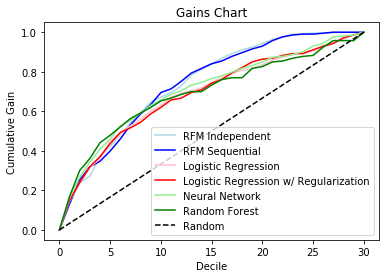

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,68.72%,68.71%,70.56%,69.19%,73.97%,73.81%


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,0.2088,0.2076,0.2048,0.2091,0.1986,0.1992


Dataset 2a


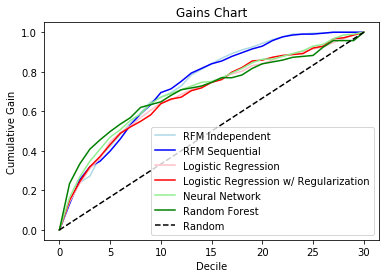

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,68.87%,69.01%,70.60%,70.46%,73.97%,73.81%


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,0.2085,0.2073,0.2048,0.2050,0.1986,0.1992


Dataset 2b


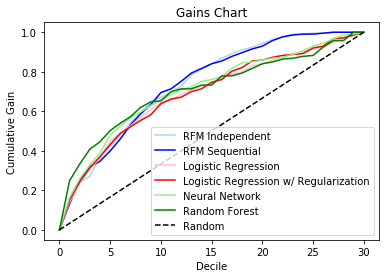

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,68.85%,68.99%,70.74%,70.85%,73.97%,73.81%


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,0.2086,0.2074,0.2048,0.2047,0.1986,0.1992


Dataset 3a


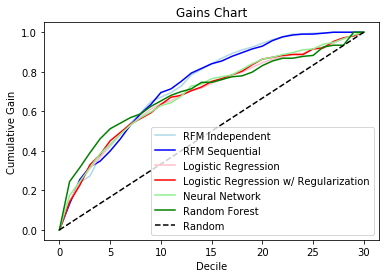

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,68.66%,68.99%,69.35%,70.23%,73.97%,73.81%


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,0.2087,0.2071,0.2073,0.2053,0.1986,0.1992


Dataset 3b


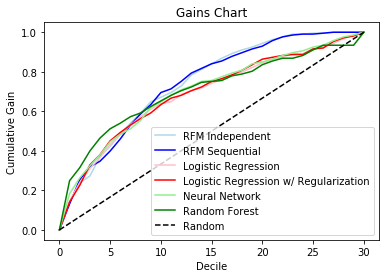

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,68.65%,68.97%,69.77%,70.37%,73.97%,73.81%


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,0.2088,0.2072,0.2061,0.2051,0.1986,0.1992


Dataset 4


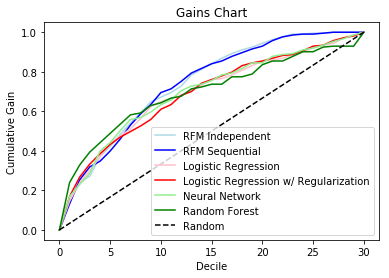

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,68.94%,68.97%,69.60%,69.68%,73.97%,73.81%


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,0.2087,0.2065,0.2071,0.2053,0.1986,0.1992


In [19]:
print("Dataset 1")
print_gains_performance(predictions1)
print("Dataset 2a")
print_gains_performance(predictions2a)
print("Dataset 2b")
print_gains_performance(predictions2b)
print("Dataset 3a")
print_gains_performance(predictions3a)
print("Dataset 3b")
print_gains_performance(predictions3b)
print("Dataset 4")
print_gains_performance(predictions4)

### c) Measure overfitting
We calculate overfitting as the difference in the AUC for each method when comparing gain AUC on the train and test datasets. We prefer models that have a smaller delta which indicates less overfitting.

In [20]:
# Define helper function to calculate and display overfitting
def calculate_overfitting(predictions, actuals):
    # Calculate gains on predictions and actuals
    gains_predict = evaluate_predictions(predictions)
    gains_actuals = evaluate_predictions(actuals)

    # Calculate gains AUC difference
    auc_predict = calculate_gains_auc(gains_predict)
    auc_actuals = calculate_gains_auc(gains_actuals)
    
    # Calculate differences
    gains_difference = gains_predict - gains_actuals
    auc_difference = auc_predict - auc_actuals
    
    # Display overfitting results
    gains_auc = auc_difference.style.format("{:.2%}")
    plot_gains_differences(gains_difference)
    display(gains_auc)

Dataset 1


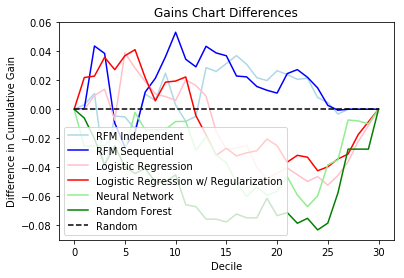

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,-1.35%,-0.73%,-3.04%,-5.36%,0.92%,1.71%


Dataset 2a


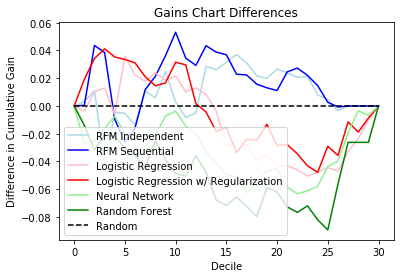

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,-1.21%,-0.37%,-3.15%,-4.83%,0.92%,1.71%


Dataset 2b


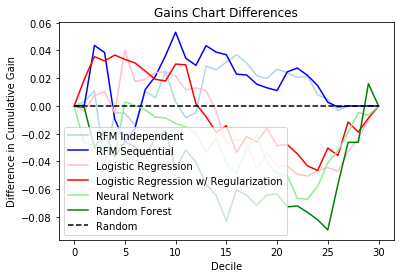

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,-1.20%,-0.37%,-2.73%,-4.49%,0.92%,1.71%


Dataset 3a


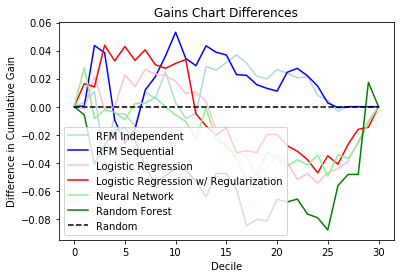

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,-1.44%,-0.41%,-2.00%,-4.88%,0.92%,1.71%


Dataset 3b


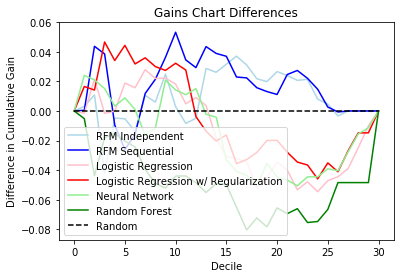

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,-1.49%,-0.42%,-1.56%,-4.88%,0.92%,1.71%


Dataset 4


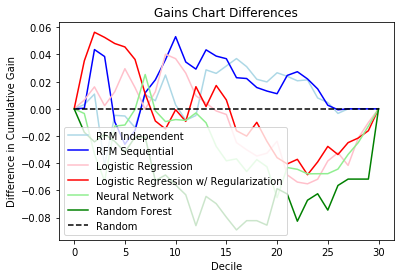

,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,-0.98%,-0.34%,-2.57%,-5.46%,0.92%,1.71%


In [21]:
print("Dataset 1")
calculate_overfitting(predictions1, actuals1)
print("Dataset 2a")
calculate_overfitting(predictions2a, actuals2a)
print("Dataset 2b")
calculate_overfitting(predictions2b, actuals2b)
print("Dataset 3a")
calculate_overfitting(predictions3a, actuals3a)
print("Dataset 3b")
calculate_overfitting(predictions3b, actuals3b)
print("Dataset 4")
calculate_overfitting(predictions4, actuals4)

### d) Evaluate precision for models

In [22]:
from sklearn.metrics import confusion_matrix

# A function to calculate a model's recall, which will be used to determine how effective
# the model is at predicting true positives out of all its predictions
def calculate_precision(predictions, actuals):
    cm = confusion_matrix(actuals, predictions)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP_rate = TP / (TP+FP)
    return TP_rate

def evaluate_dataset_precision(test_data):
    precision_log = calculate_precision(test_data['res_log'], test_data['actual_res'])
    precision_logr = calculate_precision(test_data['res_logr'], test_data['actual_res'])
    precision_nn = calculate_precision(test_data['res_nn'], test_data['actual_res'])
    precision_rf = calculate_precision(test_data['res_rf'], test_data['actual_res'])
    precision_rfmi = calculate_precision(test_data['res_rfmi'], test_data['actual_res'])
    precision_rfms = calculate_precision(test_data['res_rfms'], test_data['actual_res'])

    return pandas.DataFrame({'logistic':precision_log, 
                             'logistic_reg':precision_logr, 
                             'neural_net':precision_nn, 
                             'random_forest':precision_rf,
                             'rfm_i':precision_rfmi,
                             'rfm_s':precision_rfms}, index=[0])

def print_precision(predictions):
    precision = evaluate_dataset_precision(predictions)
    precision_styled = precision.style.format("{:.2%}")
    display(precision_styled)
    return precision

In [23]:
# Calculate the precision for each model
print("Dataset 1")
precision1 = print_precision(predictions1)
print("Dataset 2a")
precision2a = print_precision(predictions2a)
print("Dataset 2b")
precision2b = print_precision(predictions2b)
print("Dataset 3a")
precision3a = print_precision(predictions3a)
print("Dataset 3b")
precision3b = print_precision(predictions3b)
print("Dataset 4")
precision4 = print_precision(predictions4)

Dataset 1


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,9.84%,9.20%,10.63%,12.36%,9.93%,9.98%


Dataset 2a


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,9.72%,9.25%,10.55%,12.89%,9.93%,9.98%


Dataset 2b


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,9.71%,9.27%,10.35%,13.21%,9.93%,9.98%


Dataset 3a


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,9.63%,9.35%,9.85%,11.69%,9.93%,9.98%


Dataset 3b


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,9.63%,9.34%,10.06%,11.93%,9.93%,9.98%


Dataset 4


,logistic,logistic_reg,neural_net,random_forest,rfm_i,rfm_s
0,9.89%,9.23%,9.86%,11.74%,9.93%,9.98%


### e) Evaluate expected profits
Run scenario analysis to determine how much each model is expected to yield from profits

In [24]:
### A function to calculate the expected profit based on a set of predictions
### by 1) removing those who have already responded, 2) identifying those whose 
### predicted probability exceeds the threshold rate, 3) halving the predicted
### response rate, 4) calculating expected profit, and 5) subtracting the mail cost
def calculate_exp_profit(predictions, precision, field, population_size, threshold=breakeven_rate):
    # Remove people who have already responded
    second_wave_subset = predictions.loc[predictions['actual_res'] == 0]

    # Calculate the percent of people to target
    target_audience = second_wave_subset[second_wave_subset[field] > threshold]
    scaling_factor = population_size / len(second_wave_subset) # will use to scale up results

    # Calculate expected profit based on the predicted response rate (halved) times per-person profit
    # gross_profit = scaling_factor * (target_audience[field] * (per_person_profit)).sum()

    # Calculate expected profit based on the model's true-positive rate to avoid inflation
    gross_profit = scaling_factor * (precision.iloc[0] * len(target_audience)) * per_person_profit
    mail_cost = scaling_factor * len(target_audience) * per_person_mail_cost

    return [field, gross_profit - mail_cost, len(target_audience), len(second_wave_subset), 
            scaling_factor * len(target_audience), scaling_factor * len(second_wave_subset)]

### Calculate the expected profits across all the predictions
def evaluate_profits(predictions, precision, population_size, threshold=breakeven_rate):
    exp_rfmi = calculate_exp_profit(predictions, precision['rfm_i'], 'p_rfmi', population_size, threshold)
    exp_rfms = calculate_exp_profit(predictions, precision['rfm_s'], 'p_rfms', population_size, threshold)
    exp_log = calculate_exp_profit(predictions, precision['logistic'], 'p_log', population_size, threshold)
    exp_logr = calculate_exp_profit(predictions, precision['logistic_reg'], 'p_logr', population_size, threshold)
    exp_nn = calculate_exp_profit(predictions, precision['neural_net'], 'p_nn', population_size, threshold)
    exp_rf = calculate_exp_profit(predictions, precision['random_forest'], 'p_rf', population_size, threshold)

    transposed = [exp_rfmi, exp_rfms, exp_log, exp_logr, exp_nn, exp_rf]

    return pandas.DataFrame(transposed, columns=['Model', 'Expected Profit', 'Targeted People', 
                                                 'Eligible Sample', 'Targeted Population', 'Total Population'])

# Print results to console
def print_profit_performance(predictions, precision, population_size, threshold=breakeven_rate):
    profits = evaluate_profits(predictions, precision, population_size, threshold)
    profits = profits.style.format({'Expected Profit': '${:,.2f}',
                                        'Targeted People': '{:,.0f}',
                                        'Eligible Sample': '{:,.0f}',
                                        'Targeted Population': '{:,.0f}',
                                        'Total Population': '{:,.0f}'})
    display(profits)

Evaluate the models and determine the expected profitability for each model

In [25]:
# Run evaluation on datasets
total_population = 801821
wave_1_responders = 38487
mailing_population = total_population - wave_1_responders

print("Dataset 1")
print_profit_performance(predictions1, precision1, mailing_population, breakeven_rate)
print("Dataset 2a")
print_profit_performance(predictions2a, precision2a, mailing_population, breakeven_rate)
print("Dataset 2b")
print_profit_performance(predictions2b, precision2b, mailing_population, breakeven_rate)
print("Dataset 3a")
print_profit_performance(predictions3a, precision3a, mailing_population, breakeven_rate)
print("Dataset 3b")
print_profit_performance(predictions3b, precision3b, mailing_population, breakeven_rate)
print("Dataset 4")
print_profit_performance(predictions4, precision4, mailing_population, breakeven_rate)

Dataset 1


,Model,Expected Profit,Targeted People,Eligible Sample,Targeted Population,Total Population
0,p_rfmi,"$1,263,857.48","1,379","3,787","277,961","763,334"
1,p_rfms,"$1,348,439.83","1,461","3,787","294,489","763,334"
2,p_log,"$1,161,942.09","1,283","3,787","258,610","763,334"
3,p_logr,"$1,152,975.14","1,391","3,787","280,380","763,334"
4,p_nn,"$1,212,282.18","1,211","3,787","244,098","763,334"
5,p_rf,"$1,064,436.59",879,"3,787","177,177","763,334"


Dataset 2a


,Model,Expected Profit,Targeted People,Eligible Sample,Targeted Population,Total Population
0,p_rfmi,"$1,263,857.48","1,379","3,787","277,961","763,334"
1,p_rfms,"$1,348,439.83","1,461","3,787","294,489","763,334"
2,p_log,"$1,150,749.42","1,291","3,787","260,223","763,334"
3,p_logr,"$1,170,730.57","1,403","3,787","282,798","763,334"
4,p_nn,"$1,219,126.33","1,230","3,787","247,927","763,334"
5,p_rf,"$1,076,781.71",845,"3,787","170,324","763,334"


Dataset 2b


,Model,Expected Profit,Targeted People,Eligible Sample,Targeted Population,Total Population
0,p_rfmi,"$1,263,857.48","1,379","3,787","277,961","763,334"
1,p_rfms,"$1,348,439.83","1,461","3,787","294,489","763,334"
2,p_log,"$1,150,409.22","1,293","3,787","260,626","763,334"
3,p_logr,"$1,171,272.17","1,400","3,787","282,194","763,334"
4,p_nn,"$1,181,701.30","1,221","3,787","246,113","763,334"
5,p_rf,"$1,069,989.47",815,"3,787","164,277","763,334"


Dataset 3a


,Model,Expected Profit,Targeted People,Eligible Sample,Targeted Population,Total Population
0,p_rfmi,"$1,263,857.48","1,379","3,787","277,961","763,334"
1,p_rfms,"$1,348,439.83","1,461","3,787","294,489","763,334"
2,p_log,"$1,140,198.44","1,295","3,787","261,029","763,334"
3,p_logr,"$1,173,605.05","1,387","3,787","279,573","763,334"
4,p_nn,"$1,128,968.04","1,245","3,787","250,951","763,334"
5,p_rf,"$1,066,686.63",944,"3,787","190,279","763,334"


Dataset 3b


,Model,Expected Profit,Targeted People,Eligible Sample,Targeted Population,Total Population
0,p_rfmi,"$1,263,857.48","1,379","3,787","277,961","763,334"
1,p_rfms,"$1,348,439.83","1,461","3,787","294,489","763,334"
2,p_log,"$1,140,198.44","1,295","3,787","261,029","763,334"
3,p_logr,"$1,173,426.42","1,388","3,787","279,775","763,334"
4,p_nn,"$1,183,858.18","1,269","3,787","255,788","763,334"
5,p_rf,"$1,052,033.05",908,"3,787","183,023","763,334"


Dataset 4


,Model,Expected Profit,Targeted People,Eligible Sample,Targeted Population,Total Population
0,p_rfmi,"$1,263,857.48","1,379","3,787","277,961","763,334"
1,p_rfms,"$1,348,439.83","1,461","3,787","294,489","763,334"
2,p_log,"$1,163,108.07","1,276","3,787","257,199","763,334"
3,p_logr,"$1,153,882.28","1,386","3,787","279,372","763,334"
4,p_nn,"$1,162,442.79","1,280","3,787","258,006","763,334"
5,p_rf,"$1,092,837.18",962,"3,787","193,907","763,334"
